# Predicting Car Prices Using k-Nearest Neighbors
In this project, we'll use the k-Nearest Neighbors algorithm to predict a car's market price using its attributes. The dataset we'll be working with contains information on various cars. For each car, we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. More details about the dataset [here](https://archive.ics.uci.edu/ml/datasets/automobile).

### Summary of Results
We achieved the lowest RMSE of 2600.43 using a k value of 2 and the 4 best features from the dataset, namely the engine size, horsepower, curb weight, and highway mpg.

## Introduction to the Dataset

In [1]:
import pandas as pd

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Let's select only the columns with continuous values.

In [2]:
continuous_values = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [3]:
import numpy as np
numeric_cars = numeric_cars.replace("?", np.nan)
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [4]:
numeric_cars = numeric_cars.astype(float)
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Because `price` is the target column, let's remove any rows that has missing `price` values.

In [5]:
numeric_cars = numeric_cars.dropna(subset=["price"])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Let's replace missing values in columns with column means.

In [6]:
numeric_cars = numeric_cars.fillna(np.mean(numeric_cars))

Let's normalize the columns except our target column.

In [7]:
price = numeric_cars["price"]
#numeric_cars = (numeric_cars - np.mean(numeric_cars)) / np.std(numeric_cars)
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars["price"] = price

In [8]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    #shuffle order of rows in the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    #split data into training and testing
    half = int(len(shuffled_df)/2)
    train = shuffled_df.iloc[:half]
    test = shuffled_df.iloc[half:]
    
    #instantiate a knn model 
    #fit using default k and make predictions on test set
    model = KNeighborsRegressor()
    model.fit(train[[train_col]], train[target_col])
    predictions = model.predict(test[[train_col]])
    
    #RMSE
    rmse = np.sqrt(mean_squared_error(test[target_col], predictions))
    
    return rmse

In [10]:
#for each column except "price", train a model
#and record the RMSE value in rmses dictionary
train_cols = numeric_cars.columns.drop("price")
rmses = {}

for col in train_cols:
    rmses[col] = knn_train_test(col, "price", numeric_cars)

In [11]:
single_feature_rmses = pd.Series(rmses).sort_values()
single_feature_rmses

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

The `engine-size` column performed the best using the default k = 5 value with an RMSE of 3238.46.

Now, let's modify the `knn_train_test()` function to accept a parameter for the `k` value as a list.

In [12]:
def knn_train_test(train_col, target_col, df, k):
    #shuffle order of rows in the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    #split data into training and testing
    half = int(len(shuffled_df)/2)
    train = shuffled_df.iloc[:half]
    test = shuffled_df.iloc[half:]
    
    k_rmses = {}
    for k_val in k:
        #instantiate a knn model 
        #fit using k_val and make predictions on test set
        model = KNeighborsRegressor(n_neighbors=k_val)
        model.fit(train[[train_col]], train[target_col])
        predictions = model.predict(test[[train_col]])

        #RMSE
        rmse = np.sqrt(mean_squared_error(test[target_col], predictions))
        k_rmses[k_val] = rmse
    
    return k_rmses

In [13]:
#for each column except "price", train a model
#and record the RMSE value in rmses dictionary
train_cols = numeric_cars.columns.drop("price")
k_rmses = {}

for col in train_cols:
    k_rmses[col] = knn_train_test(col, "price", numeric_cars, [1,3,5,7,9])
    
k_rmses

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


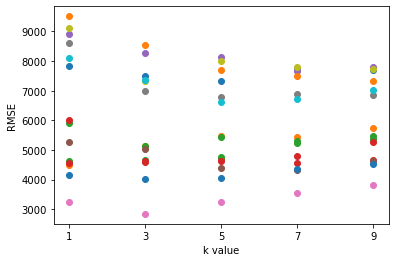

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

for i,j in k_rmses.items():
    x = list(j.keys())
    y = list(j.values())
    
    plt.scatter(x,y)
    plt.xlabel("k value")
    plt.ylabel("RMSE")
    plt.xticks([1,3,5,7,9])

## Multivariate Model
Now, let's modify the `knn_train_test()` function to work with multiple columns.

In [15]:
def knn_train_test(train_cols, target_col, df):
    #shuffled order of rows in the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    #split data into training and test set
    half = int(len(shuffled_df)/2)
    train = shuffled_df.iloc[:half]
    test = shuffled_df.iloc[half:]
    
    #instantiate a knn model 
    #fit using default k and make predictions on test set
    model = KNeighborsRegressor()
    model.fit(train[train_cols], train[target_col])
    predictions = model.predict(test[train_cols])
    
    #RMSE
    rmse = np.sqrt(mean_squared_error(test[target_col], predictions))
    
    return rmse

In [16]:
knn_train_test(numeric_cars.columns.drop("price"), "price", numeric_cars)

3726.6377183145073

Let's now use the best number of features (with the lowest RMSEs) from our univariate model to train and test a multivariate k-nearest neighbors model using the default k = 5 value. Recall that we have the features and their corresponding RMSEs stored in `single_feature_rmses` in ascending order. We'll use the best 2, 3, 4, and 5 features for each model.

In [17]:
single_feature_rmses = single_feature_rmses.reset_index()
single_feature_rmses = single_feature_rmses.rename(columns={"index": "feature", 0: "rmse"})
single_feature_rmses

,feature,rmse
0,engine-size,3238.462830
1,horsepower,4037.037713
2,curb-weight,4401.118255
3,highway-mpg,4630.026799
4,width,4704.482590
5,city-mpg,4766.422505
6,length,5427.200961
7,wheel-base,5461.553998
8,compression-rate,6610.812153
9,bore,6780.627785


In [18]:
best_n_features = {}
for n_features in np.arange(2,6):
    best_n_features[n_features] = knn_train_test(single_feature_rmses[:n_features]["feature"], "price", numeric_cars)
    
best_n_features

{2: 2949.8817277180374,
 3: 3435.2601095401815,
 4: 3286.5597353252815,
 5: 3410.2170133901805}

## Hyperparameter Tuning
For the models in the previous step, let's vary the hyperparameter value of k from 1 to 25 and plot the resulting RMSE values.

In [19]:
def knn_train_test(train_col, target_col, df):
    #shuffle order of rows in the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    #split data into training and testing
    half = int(len(shuffled_df)/2)
    train = shuffled_df.iloc[:half]
    test = shuffled_df.iloc[half:]
    
    k = np.arange(1,26)
    k_rmses = {}
    for k_val in k:
        #instantiate a knn model 
        #fit using k_val and make predictions on test set
        model = KNeighborsRegressor(n_neighbors=k_val)
        model.fit(train[train_col], train[target_col])
        predictions = model.predict(test[train_col])

        #RMSE
        rmse = np.sqrt(mean_squared_error(test[target_col], predictions))
        k_rmses[k_val] = rmse
    
    return k_rmses

In [20]:
best_n_features = {}
for n_features in np.arange(2,6):
    best_n_features["{} best features".format(n_features)] = knn_train_test(single_feature_rmses[:n_features]["feature"], "price", numeric_cars)
    
best_n_features

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '3 best features': {1: 3131.798233957262,
  2: 3005.5737903777945,
  3: 3016.72346189447,
  4: 3144.445503247916,
  5: 3435.2601095401815,
  6: 3490.638342356411,
  7: 3734.328302612299,
  8: 3936.1203798667007,
  9: 3976.4878693193755,
  10: 4124.277723900439,
  11: 4213.73633336988,
  12: 4230.509703492906,
  13: 4176.851250534326,
  14: 4292.415585753

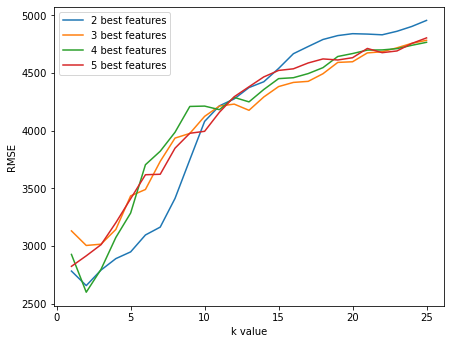

In [21]:
plt.figure(figsize=(7,5.5))
for k,v in best_n_features.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x, y, label=k)

plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc="upper left")

In [22]:
for i,j in best_n_features.items():
    for k,v in j.items():
        if v == min(j.values()):
            print("For the {},".format(i), "the optimal k value is {}".format(k), "with an RMSE of {}.".format(min(j.values())))

For the 2 best features, the optimal k value is 2 with an RMSE of 2657.7963807419765.
For the 3 best features, the optimal k value is 2 with an RMSE of 3005.5737903777945.
For the 4 best features, the optimal k value is 2 with an RMSE of 2600.431466008274.
For the 5 best features, the optimal k value is 1 with an RMSE of 2824.7061233282866.


## Next Steps
Modify the `knn_train_test()` function to use k-fold cross validation instead of train/test validation.